## 19.2 Loading the MNIST dataset in Keras

In [8]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

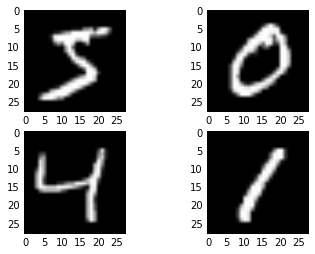

In [9]:
%matplotlib inline
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

## 19.3 Baseline Model with Multilayer Perceptrons

In [10]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [11]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [19]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [22]:
#define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
    model.add(Dense(num_classes, init='normal', activation='softmax'))
    
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [25]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
5s - loss: 0.2791 - acc: 0.9203 - val_loss: 0.1421 - val_acc: 0.9577
Epoch 2/10
4s - loss: 0.1122 - acc: 0.9678 - val_loss: 0.0996 - val_acc: 0.9696
Epoch 3/10
4s - loss: 0.0724 - acc: 0.9790 - val_loss: 0.0784 - val_acc: 0.9749
Epoch 4/10
5s - loss: 0.0511 - acc: 0.9853 - val_loss: 0.0777 - val_acc: 0.9771
Epoch 5/10
4s - loss: 0.0366 - acc: 0.9894 - val_loss: 0.0630 - val_acc: 0.9795
Epoch 6/10
5s - loss: 0.0264 - acc: 0.9931 - val_loss: 0.0635 - val_acc: 0.9795
Epoch 7/10
5s - loss: 0.0186 - acc: 0.9957 - val_loss: 0.0600 - val_acc: 0.9812
Epoch 8/10
5s - loss: 0.0149 - acc: 0.9968 - val_loss: 0.0623 - val_acc: 0.9820
Epoch 9/10
6s - loss: 0.0107 - acc: 0.9980 - val_loss: 0.0593 - val_acc: 0.9817
Epoch 10/10
6s - loss: 0.0072 - acc: 0.9988 - val_loss: 0.0599 - val_acc: 0.9821
Baseline Error: 1.79%


## 19.4 Simple Convolutional Neural Network for MNIST

In [26]:
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D

In [28]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [29]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [31]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [32]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(32, 5, 5, border_mode='valid', input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [33]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
45s - loss: 0.2412 - acc: 0.9317 - val_loss: 0.0754 - val_acc: 0.9770
Epoch 2/10
42s - loss: 0.0726 - acc: 0.9781 - val_loss: 0.0528 - val_acc: 0.9830
Epoch 3/10
43s - loss: 0.0496 - acc: 0.9852 - val_loss: 0.0389 - val_acc: 0.9861
Epoch 4/10
43s - loss: 0.0412 - acc: 0.9870 - val_loss: 0.0418 - val_acc: 0.9863
Epoch 5/10
43s - loss: 0.0323 - acc: 0.9898 - val_loss: 0.0379 - val_acc: 0.9864
Epoch 6/10
42s - loss: 0.0282 - acc: 0.9909 - val_loss: 0.0417 - val_acc: 0.9868
Epoch 7/10
42s - loss: 0.0222 - acc: 0.9928 - val_loss: 0.0327 - val_acc: 0.9891
Epoch 8/10
42s - loss: 0.0197 - acc: 0.9938 - val_loss: 0.0374 - val_acc: 0.9881
Epoch 9/10
42s - loss: 0.0158 - acc: 0.9950 - val_loss: 0.0334 - val_acc: 0.9887
Epoch 10/10
42s - loss: 0.0141 - acc: 0.9954 - val_loss: 0.0313 - val_acc: 0.9896
CNN Error: 1.04%


## 19.5 Larger Convolutional Neural Network for MNIST

In [35]:
# Larger CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [36]:
# define the larger model
def larger_model():
  # create model
  model = Sequential()
  model.add(Convolution2D(30, 5, 5, border_mode='valid', input_shape=(1, 28, 28), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Convolution2D(15, 3, 3, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [37]:
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
45s - loss: 0.3785 - acc: 0.8793 - val_loss: 0.0811 - val_acc: 0.9742
Epoch 2/10
45s - loss: 0.0929 - acc: 0.9707 - val_loss: 0.0464 - val_acc: 0.9855
Epoch 3/10
47s - loss: 0.0684 - acc: 0.9788 - val_loss: 0.0369 - val_acc: 0.9876
Epoch 4/10
46s - loss: 0.0544 - acc: 0.9828 - val_loss: 0.0339 - val_acc: 0.9888
Epoch 5/10
45s - loss: 0.0466 - acc: 0.9857 - val_loss: 0.0286 - val_acc: 0.9898
Epoch 6/10
47s - loss: 0.0400 - acc: 0.9875 - val_loss: 0.0297 - val_acc: 0.9899
Epoch 7/10
47s - loss: 0.0371 - acc: 0.9878 - val_loss: 0.0234 - val_acc: 0.9918
Epoch 8/10
45s - loss: 0.0326 - acc: 0.9896 - val_loss: 0.0280 - val_acc: 0.9910
Epoch 9/10
46s - loss: 0.0311 - acc: 0.9903 - val_loss: 0.0224 - val_acc: 0.9923
Epoch 10/10
45s - loss: 0.0268 - acc: 0.9916 - val_loss: 0.0231 - val_acc: 0.9920
Large CNN Error: 0.80%


## 20.2 Point of Comparison for Image Augmentation

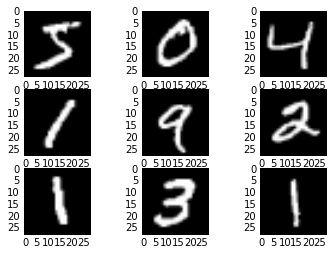

In [46]:
# Plot of images as baseline for comparison
from keras.datasets import mnist
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

## 20.3 Feature Standardization

In [47]:
from keras.preprocessing.image import ImageDataGenerator
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

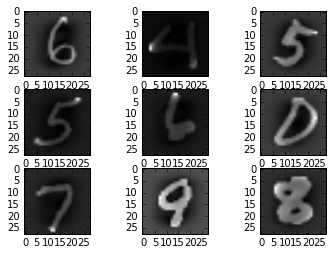

In [48]:
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
# calculate any statistics required to actually perform the transforms
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

## 20.4 ZCA Whitening

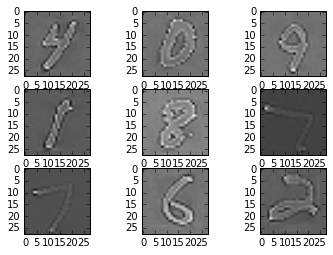

In [50]:
# define data preparation
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

## 20.5 Random Rotations

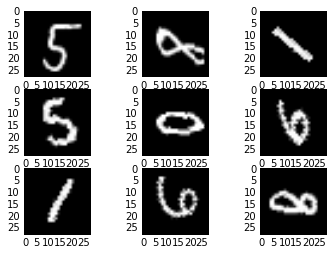

In [51]:
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

## 20.6 Random Shifts

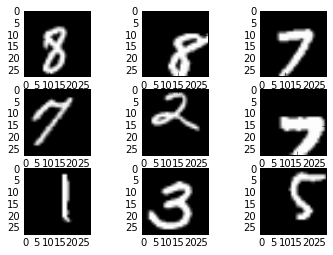

In [53]:
# define data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

## 20.7 Random Flips

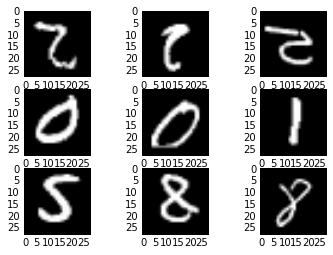

In [54]:
# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

## 20.8 Saving Augmented Images to File

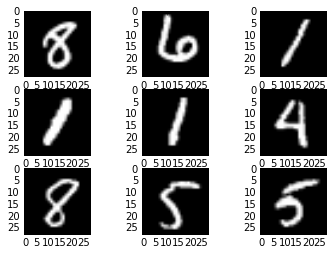

In [56]:
import os
# define data preparation
datagen = ImageDataGenerator()
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
os.makedirs('images')
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', 
                                     save_prefix='aug', save_format='png'):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break